#**STUDENTS PREDICITON**

In [251]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as pyplot
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz
from sklearn import tree
from sklearn.feature_selection import VarianceThreshold

In [252]:
data= pd.read_csv('/content/students prediciton.csv')
data.head()

,school,sex,address,Mothers job,Fathers job,reason,guardian,schoolsup,famsup,paid,activities,higher,internet,age,traveltime,studytime,failures,health,absences,G1,G2,G3,FinalGrade
0,GP,F,U,at_home,teacher,course,mother,yes,no,no,no,yes,no,0.6,0.5,0.5,NaN,0.5,0.3,0.000000,0.071429,0.071429,Poor
1,GP,F,U,at_home,other,course,father,no,yes,no,no,yes,yes,0.4,0.0,0.5,NaN,0.5,0.2,0.000000,0.000000,0.071429,Poor
2,GP,F,U,health,services,family,mother,no,yes,yes,yes,yes,yes,0.0,0.0,1.0,NaN,1.0,0.1,0.714286,0.642857,0.714286,Good
3,GP,F,U,other,other,family,father,no,yes,yes,no,yes,no,0.2,0.0,0.5,NaN,1.0,0.2,0.071429,0.357143,0.357143,Poor
4,GP,M,U,services,other,recog,mother,no,yes,yes,yes,yes,yes,0.2,0.0,0.5,NaN,1.0,0.5,0.714286,0.714286,0.714286,Good


In [253]:
label_encoder = preprocessing.LabelEncoder()
for i in data:
  data[i]= label_encoder.fit_transform(data[i])

In [254]:
data1=pd.DataFrame()
for i in data:
  data1[i] = data[i]

In [255]:
data.head()

,school,sex,address,Mothers job,Fathers job,reason,guardian,schoolsup,famsup,paid,activities,higher,internet,age,traveltime,studytime,failures,health,absences,G1,G2,G3,FinalGrade
0,0,0,1,0,4,0,1,1,0,0,0,1,0,3,1,1,0,2,6,0,1,1,3
1,0,0,1,0,2,0,0,0,1,0,0,1,1,2,0,1,0,2,4,0,0,1,3
2,0,0,1,1,3,1,1,0,1,1,1,1,1,0,0,2,0,4,2,10,9,13,2
3,0,0,1,2,2,1,0,0,1,1,0,1,0,1,0,1,0,4,4,1,5,8,3
4,0,1,1,3,2,3,1,0,1,1,1,1,1,1,0,1,0,4,10,10,10,13,2


In [256]:
data.shape

(651, 23)

In [257]:
data.isnull().sum()

school         0
sex            0
address        0
Mothers job    0
Fathers job    0
reason         0
guardian       0
schoolsup      0
famsup         0
paid           0
activities     0
higher         0
internet       0
age            0
traveltime     0
studytime      0
failures       0
health         0
absences       0
G1             0
G2             0
G3             0
FinalGrade     0
dtype: int64

##**Split inot train and test**

In [258]:
#Final grades
y =  data[[ 'G3']].mean(axis=1)
data = data.drop(["G3"], axis=1)
data.head()

,school,sex,address,Mothers job,Fathers job,reason,guardian,schoolsup,famsup,paid,activities,higher,internet,age,traveltime,studytime,failures,health,absences,G1,G2,FinalGrade
0,0,0,1,0,4,0,1,1,0,0,0,1,0,3,1,1,0,2,6,0,1,3
1,0,0,1,0,2,0,0,0,1,0,0,1,1,2,0,1,0,2,4,0,0,3
2,0,0,1,1,3,1,1,0,1,1,1,1,1,0,0,2,0,4,2,10,9,2
3,0,0,1,2,2,1,0,0,1,1,0,1,0,1,0,1,0,4,4,1,5,3
4,0,1,1,3,2,3,1,0,1,1,1,1,1,1,0,1,0,4,10,10,10,2


In [259]:
#spliting data to train and test by 70% and 30% respectievely 
X_train, X_test, y_train, y_test = train_test_split(data,y, test_size=0.3,random_state=4)

#**FEATURE SELECTION**

##**Removing Duplicate Features**

In [260]:
train_features_T = X_train.T
train_features_T.shape

(22, 455)

In [261]:
print(train_features_T.duplicated().sum())

0


In [262]:
unique_features = train_features_T.drop_duplicates(keep='first').T
unique_features.shape

(455, 22)

In [263]:
duplicated_features = [dup_col for dup_col in X_train.columns if dup_col not in unique_features.columns]
duplicated_features

[]

##**Variance threshold**

Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [264]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [265]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True])

In [266]:
X_train.columns[var_thres.get_support()]

Index(['school', 'sex', 'address', 'Mothers job', 'Fathers job', 'reason',
       'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'higher',
       'internet', 'age', 'traveltime', 'studytime', 'health', 'absences',
       'G1', 'G2', 'FinalGrade'],
      dtype='object')

In [267]:
constant_columns=[column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]
constant_columns

['failures']

In [268]:
len(constant_columns)

1

In [269]:
X_train.drop(constant_columns,axis=1,inplace=True)
X_test.drop(constant_columns,axis=1,inplace=True)

##**Feature selection using Correlation**

In [270]:
X_train.corr()

,school,sex,address,Mothers job,Fathers job,reason,guardian,schoolsup,famsup,paid,activities,higher,internet,age,traveltime,studytime,health,absences,G1,G2,FinalGrade
school,1.000000,-0.103021,-0.375457,-0.190087,-0.093433,-0.073534,-0.150816,-0.087123,-0.099930,-0.171346,-0.071925,-0.155633,-0.265228,0.024405,0.345028,-0.164070,-0.035687,-0.178762,-0.147788,-0.143663,0.028192
sex,-0.103021,1.000000,0.001111,0.204694,0.128417,0.062911,-0.029101,-0.116116,-0.116955,0.039390,0.105329,0.008597,0.115748,0.033115,-0.003197,-0.228693,0.065306,0.069388,0.077815,0.067988,-0.047017
address,-0.375457,0.001111,1.000000,0.139842,0.001307,-0.036329,0.003361,0.064569,0.006907,0.082072,-0.060256,0.140224,0.203702,-0.006562,-0.288204,0.124223,-0.025157,0.023299,0.115394,0.122250,0.001269
Mothers job,-0.190087,0.204694,0.139842,1.000000,0.246023,0.042533,0.055497,-0.002103,-0.020490,0.067389,0.126866,0.133433,0.266034,-0.021485,-0.140797,0.027877,0.035036,0.040355,0.223266,0.200773,-0.100308
Fathers job,-0.093433,0.128417,0.001307,0.246023,1.000000,0.030683,-0.095939,0.000284,-0.001092,-0.013892,0.010914,0.021054,0.117426,-0.036577,-0.001315,-0.073592,0.012688,-0.057441,0.166115,0.149938,-0.085902
reason,-0.073534,0.062911,-0.036329,0.042533,0.030683,1.000000,0.037209,0.040308,0.043594,0.074333,0.093848,0.058440,0.086465,0.029851,0.072044,0.037055,-0.144430,0.045318,0.083024,0.096680,-0.028456
guardian,-0.150816,-0.029101,0.003361,0.055497,-0.095939,0.037209,1.000000,0.031069,-0.003259,0.088344,0.100764,0.025999,0.013453,0.142884,-0.059731,0.087242,-0.051704,0.122401,-0.061102,-0.074668,-0.029009
schoolsup,-0.087123,-0.116116,0.064569,-0.002103,0.000284,0.040308,0.031069,1.000000,0.079361,0.031072,-0.001469,0.070677,-0.049397,-0.172247,-0.071465,0.059979,-0.003680,0.011151,-0.138091,-0.121900,0.067387
famsup,-0.099930,-0.116955,0.006907,-0.020490,-0.001092,0.043594,-0.003259,0.079361,1.000000,0.206744,-0.082533,0.014217,0.028517,-0.077432,-0.057777,0.121497,0.055336,0.006523,-0.093502,-0.108672,0.062944
paid,-0.171346,0.039390,0.082072,0.067389,-0.013892,0.074333,0.088344,0.031072,0.206744,1.000000,-0.024164,0.110069,0.101431,-0.127991,-0.069784,0.067390,-0.039963,0.129111,-0.062358,-0.082940,-0.010499


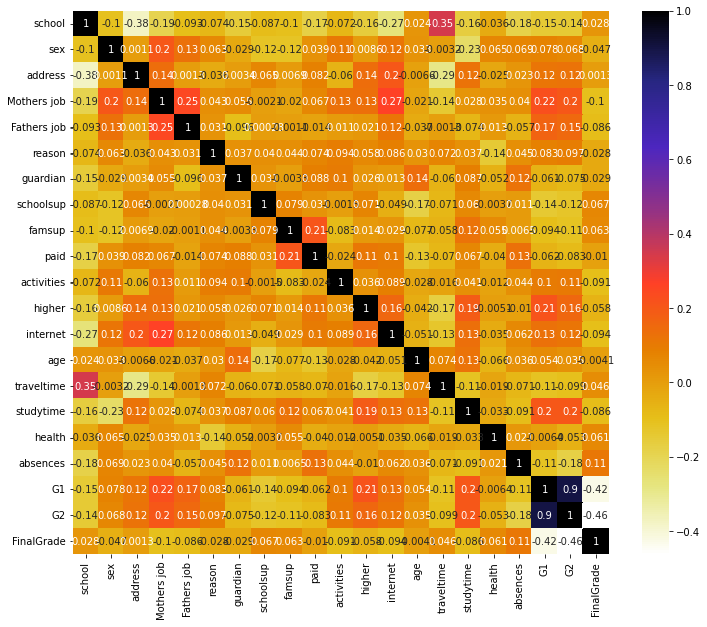

In [271]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [272]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [273]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

1

In [274]:
corr_features

{'G2'}

In [275]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,school,sex,address,Mothers job,Fathers job,reason,guardian,schoolsup,famsup,paid,activities,higher,internet,age,traveltime,studytime,health,absences,G1,FinalGrade
253,1,0,0,2,2,3,1,0,1,1,1,1,1,2,0,1,0,17,5,3
202,0,0,1,1,2,3,2,0,1,1,1,1,1,4,1,1,1,0,5,3
618,1,0,1,2,2,1,1,0,0,0,0,1,1,3,0,1,0,1,11,2
280,0,1,1,2,2,3,0,0,0,0,1,1,1,2,0,1,3,4,6,3
303,0,0,1,2,2,0,1,0,1,0,0,1,0,2,0,1,0,0,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0,1,1,2,2,3,1,0,0,0,1,1,0,1,0,0,4,2,7,4
338,0,0,0,0,3,0,1,0,0,0,1,1,0,2,2,1,2,2,8,4
251,1,0,0,4,3,0,1,0,0,1,1,1,1,3,0,1,1,11,3,3
98,0,0,1,4,3,0,1,0,1,1,1,1,1,0,0,2,4,2,4,4


#**MODELS**

##**Linear Regression**

Mean squared error: 1.19
Mean difference: 0.80
r2 score: 0.90
Confusion matrix
 [[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  1  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  5  4  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 10 10  3  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  8 11  8  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  4  7  8  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  2  6  6  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  9  7  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  4 10  8  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  4  4  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  2  1  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]]
 

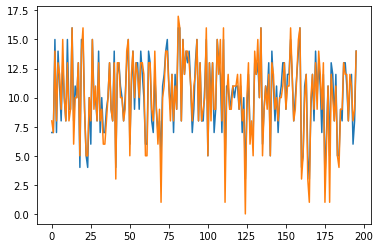

In [276]:
# training the model on training set using linear regression
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
ly_pred = np.round(regr.predict(X_test))
meansqr=[]
Avgdiff=[]
r2=[]
meansqr.append(mean_squared_error(y_test, ly_pred))
Avgdiff.append(abs(y_test-ly_pred).mean())
r2.append(r2_score(y_test, ly_pred))
print("Mean squared error: %.2f"% mean_squared_error(y_test, ly_pred))
print("Mean difference: %.2f"% abs(y_test-ly_pred).mean())
print("r2 score: %.2f"% r2_score(y_test, ly_pred))
print("Confusion matrix\n",confusion_matrix(y_test, ly_pred))
print(classification_report(y_test, ly_pred))

#plotting y_pred and y_test
t = np.arange(0,len(ly_pred) , 1)
plt.plot(t,ly_pred,t,y_test)

##**Random Forest**

Mean squared error: 0.93
Mean difference: 0.66
r2 score: 0.92
Confusion matrix
 [[ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  5  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1 16  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 17 11  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  7 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3 10  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1 12 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 14  8  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  6  6  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  2  4  0  0]
 [ 0  0 

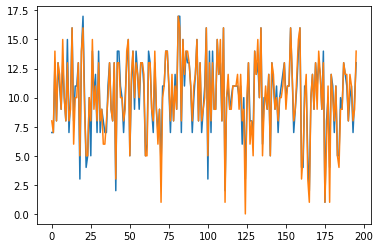

In [277]:
# RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 60, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);
ry_pred =np.round(rf.predict(X_test))
meansqr.append(mean_squared_error(y_test, ry_pred ))
Avgdiff.append(abs(y_test-ry_pred).mean())
r2.append(r2_score(y_test, ry_pred ))
print("Mean squared error: %.2f"% mean_squared_error(y_test, ry_pred))
print("Mean difference: %.2f"% abs(y_test-ry_pred).mean())
print("r2 score: %.2f"% r2_score(y_test, ry_pred))
print("Confusion matrix\n",confusion_matrix(y_test, ry_pred))
print(classification_report(y_test, ry_pred))
#plotting y_pred and y_test
t = np.arange(0,len(ry_pred) , 1)
plt.plot(t,ry_pred,t,y_test)

##**Support vector Machine**

Mean squared error: 1.15
Mean difference: 0.84
r2 score: 0.90


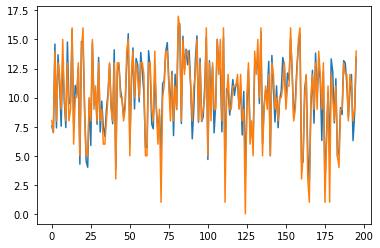

In [278]:
#svm regressor

regressor=SVR(kernel="linear",epsilon=1.0,degree=3)
regressor.fit(X_train,y_train)
sy_pred=regressor.predict(X_test)
meansqr.append(mean_squared_error(y_test,sy_pred))
Avgdiff.append(abs(y_test-sy_pred).mean())
r2.append(r2_score(y_test, sy_pred))
print("Mean squared error: %.2f"% mean_squared_error(y_test, sy_pred))
print("Mean difference: %.2f"% abs(y_test-sy_pred).mean())
print("r2 score: %.2f"% r2_score(y_test, sy_pred))
#print("Confusion matrix\n",confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))
#plotting y_pred and y_test
t = np.arange(0,len(sy_pred) , 1)
plt.plot(t,sy_pred,t,y_test)

##**K nearest Neighbour**

Mean squared error: 1.71
Mean difference: 0.98
r2 score: 0.85


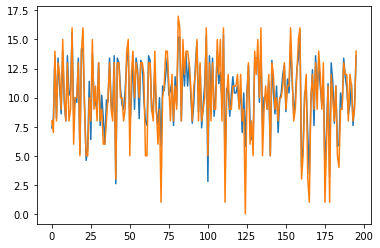

In [279]:
#knearest neighbhors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train,y_train)
ky_pred=knn.predict(X_test)
meansqr.append(mean_squared_error(y_test, ky_pred))
Avgdiff.append(abs(y_test-ky_pred).mean())
r2.append(r2_score(y_test, ky_pred))
print("Mean squared error: %.2f"% mean_squared_error(y_test, ky_pred))
print("Mean difference: %.2f"% abs(y_test-ky_pred).mean())
print("r2 score: %.2f"% r2_score(y_test, ky_pred))
#print("Confusion matrix\n",confusion_matrix(y_test, ky_pred))
#print(classification_report(y_test, ky_pred))
#plotting ky_pred and y_test
t = np.arange(0,len(ky_pred) , 1)
plt.plot(t,ky_pred,t,y_test)

#hello

In [286]:
from sklearn.tree import DecisionTreeClassifier

In [281]:
student_features = data1.columns.tolist()
student_features.remove('FinalGrade') 
#student_features.remove('G3') 
student_features

['school',
 'sex',
 'address',
 'Mothers job',
 'Fathers job',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'higher',
 'internet',
 'age',
 'traveltime',
 'studytime',
 'failures',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [282]:
y = data1['FinalGrade']
X = data1.drop(["FinalGrade"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4)

In [283]:
dtfit = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=len(X.columns))
dtfit = dtfit.fit(X_train, y_train)
y_pred=dtfit.predict(X_test)
print("Accuray:", r2_score(y_test, y_pred))

Accuray: 1.0


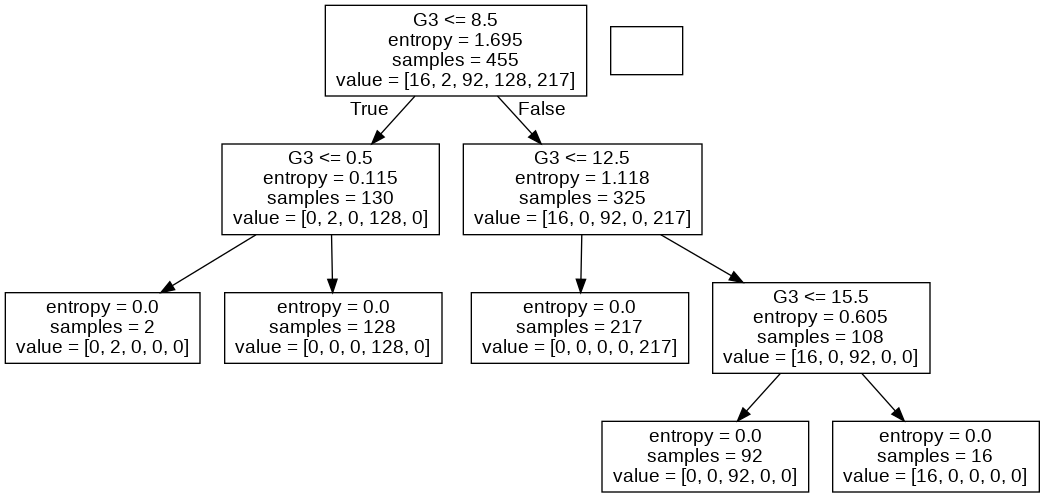

In [284]:
dot_data = StringIO()  
tree.export_graphviz(dtfit, out_file=dot_data, feature_names=student_features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [285]:
import warnings
warnings.filterwarnings('ignore')
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8979591836734694